In [10]:
#imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from numpy import genfromtxt

## Concerns housing values in suburbs of Boston.

- Number of Instances: 506
- Number of Attributes: 13 continuous attributes (including "class"
- attribute "MEDV"), 1 binary-valued attribute.
- Attribute Information:
- CRIM per capita crime rate by town
- ZN proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS proportion of non-retail business acres per town
- CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX nitric oxides concentration (parts per 10 million)
- RM average number of rooms per dwelling
- AGE proportion of owner-occupied units built prior to 1940
- DIS weighted distances to five Boston employment centres
- RAD index of accessibility to radial highways
- TAX full-value property-tax rate per \$10,000
- PTRATIO pupil-teacher ratio by town
- B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT % lower status of the population
- MEDV Median value of owner-occupied homes in $1000's
- Missing Attribute Values: None.

link - https://www.kaggle.com/datasets/arslanali4343/real-estate-dataset

In [15]:
#import data as well as header separately

housing_data_filename = 'housing-data.csv'

#import data without header
all_data = genfromtxt(housing_data_filename, delimiter=',', skip_header=1)

all_data_with_header = np.genfromtxt(housing_data_filename, delimiter=",", skip_header=0, dtype=None)
header_names = [name.decode('UTF-8') for name in all_data_with_header[0,:]][0:]

C:\Users\osaya\AppData\Local\Temp/ipykernel_26360/1110805638.py:8: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  all_data_with_header = np.genfromtxt(housing_data_filename, delimiter=",", skip_header=0, dtype=None)


In [16]:
print(header_names)

all_data.shape

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


(511, 14)

In [17]:
#seprate data into features and labels.

label_col = all_data.shape[1]-1
X_train = all_data[:,0:label_col]
y_train = all_data[:,label_col]
X_features = header_names[0:label_col]
X_features

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [18]:
#count the number of NAN in numpy array
print(X_train[10, :])
np.count_nonzero(np.isnan(X_train))

[2.2489e-01 1.2500e+01 7.8700e+00 0.0000e+00 5.2400e-01        nan
 9.4300e+01 6.3467e+00 5.0000e+00 3.1100e+02 1.5200e+01 3.9252e+02
 2.0450e+01]


5

In [19]:
#Replace NAN with 0 and infinity with very large number
X_train = np.nan_to_num(X_train)

In [25]:
#use Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train) 

LinearRegression()

In [26]:
#View parameters
b = linear_model.intercept_
w = linear_model.coef_
print(f"w = {w:}, b = {b:0.2f}")

w = [-1.68594439e-01  6.28241742e-02 -9.04769287e-02  3.27661927e+00
 -1.95513207e+01  2.82072811e+00 -3.22938126e-02 -1.89927086e+00
  2.78552107e-01 -1.48341373e-02 -7.64521617e-01  1.01245209e-02
 -2.17717242e-01], b = 42.79


In [28]:
#make predictions
print(f"Prediction on training set:\n {linear_model.predict(X_train)[:4]}" )
print(f"prediction using w,b:\n {(X_train @ w + b)[:4]}")
print(f"Target values \n {y_train[:4]}")
y_pred = np.dot(X_train, w) + b  

Prediction on training set:
 [28.98942765 24.49334459 28.29454241 26.98061164]
prediction using w,b:
 [28.98942765 24.49334459 28.29454241 26.98061164]
Target values 
 [24.  21.6 34.7 33.4]


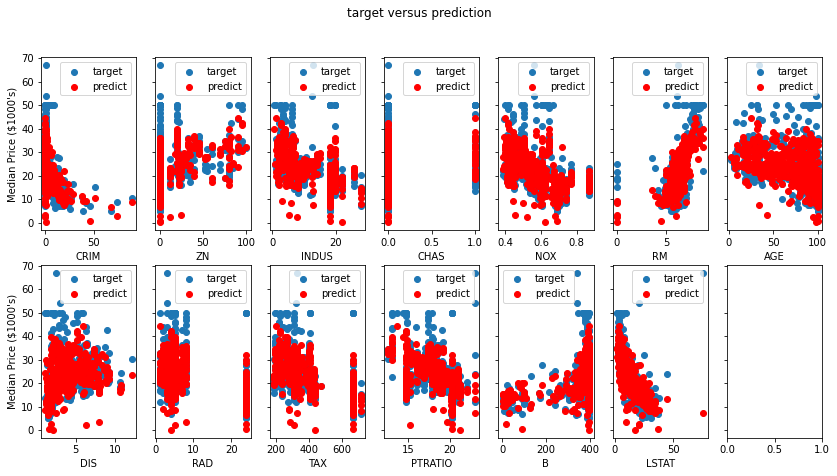

In [31]:
# plot predictions and targets vs original features    
fig,ax=plt.subplots(2,7,figsize=(14,7),sharey=True)

for i in range(X_train.shape[1]):
    row = int(i / 7)
    col = int(i % 7)
    ax[row, col].scatter(X_train[:,i],y_train, label = 'target')
    ax[row,col].set_xlabel(X_features[i])
    ax[row,col].scatter(X_train[:,i],y_pred,color='r', label = 'predict')
    ax[row,col].legend();
ax[0,0].set_ylabel("Median Price ($1000's)"); 
ax[1,0].set_ylabel("Median Price ($1000's)");
fig.suptitle("target versus prediction")
plt.show()